In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')

## PART ONE

In [2]:
# importing the dataset
df = pd.read_csv('Belt2_A_drug_type.csv')

In [3]:
#using a background style to visualise better the numerical varibales
# higher is the number stronger is the color assigned
df.head().style.background_gradient(axis=0)

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# Only BP has 2 missing values the rest looks good 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Gender         200 non-null object
BP             198 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null object
Drug           200 non-null object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


In [5]:
#Row 153 & 195 are empty for BP
df[df['BP'].isna()]

,Age,Gender,BP,Cholesterol,Na_to_K,Drug
153,72,F,NaN,NORMAL,14.642,drugX
195,56,F,NaN,HIGH,11.567,drugC


In [6]:
# BP (Blood pressure levels (low, normal, or high))
# has 2 missing values which i choose not to replace but to dropbecause the only way
# to replace was assigning random variablesin this case and this could affect ur prediction (is not a numerical variable)

df = df.dropna()
df.shape

(198, 6)

In [7]:
# This is the dictionary provided in the Coding Dojo Task

#Age --> Iteger
#DRUG --> Object
#Gender --> Object
#BP --> Object
#Cholesterol --> Object
#NA_to_K --> Float

In [8]:
# We can notice that NA_to_K needs to be converted to float
df.dtypes

Age             int64
Gender         object
BP             object
Cholesterol    object
Na_to_K        object
Drug           object
dtype: object

In [9]:
# no dublicated values found in the dataframe
df.duplicated().sum()

0

In [11]:
# By printing all the unique values of each column we can notice differenct problems:

# Age has typo errors like 570 instead of 57
# Gender has more than 1 way for showing the gender, needs to be fixed
# Blood Pressure needs some modificatin aswell because we need a 2 level varibale there
# Cholesterol has the same issues as Gender and Blood Pressure
# Na_to_K has some type erros '10.403_' , '9.712_' which not allow the variable to be converted 
# Drug i have decided to remove the word DRUG and leave only the letter (A,B,C,X,Y)

for col in df:
    print(df[col].unique())

[ 23  47  28  61  22  49  41  60  43  34  74  50  16  69  32  57  63  48
  33  31  39  45  18  65  53  46  15  73  58  66  37  68  67  62  24  26
  40  38  29  17  54  70  36  19  64  59  51  42  56  20  72  35  52  55
  30  21 570  25]
['F' 'M' 'femal' 'Female' 'Male' 'male' 'female' 'Femal']
['HIGH' 'LOW' 'NORMAL' 'L0w' 'High' 'Normal' 'low' 'Low' 'high' 'normal']
['HIGH' 'high' 'NORMAL' 'norm' 'NORM']
['25.355' '13.093' '10.114' '7.798' '18.043' '8.607' '16.275' '11.037'
 '15.171' '19.368' '11.767' '19.199' '15.376' '20.942' '12.703' '15.516'
 '11.455' '13.972' '7.298' '25.974' '19.128' '25.917' '30.568' '15.036'
 '33.486' '18.809' '30.366' '9.381' '22.697' '17.951' '8.75' '9.567'
 '11.014' '31.876' '14.133' '7.285' '9.445' '13.938' '9.709' '9.084'
 '19.221' '14.239' '15.79' '12.26' '12.295' '8.107' '13.091' '10.291'
 '31.686' '19.796' '19.416' '10.898' '27.183' '18.457' '10.189' '14.16'
 '11.34' '27.826' '10.091' '18.703' '29.875' '9.475' '20.693' '8.37'
 '13.303' '27.05' '12.856' 

In [12]:
# Converting everything to uppercase will make it easy to make 
# some changes in the future

df['Gender'] = df['Gender'].str.upper()
df['BP'] = df['BP'].str.upper()
df['Cholesterol'] = df['Cholesterol'].str.upper()
df['Drug'] = df['Drug'].str.upper()
df['Drug'] = df['Drug'] = df['Drug'].str.lstrip('DRUG')

In [13]:
# Applied all the modifications listed above about the format and the level of the varibales
# Now that data is clened and formated we can contiue with our analysis

df['Age'] = df['Age'].replace([570],57)
df['Gender'] = df['Gender'].replace(['FEMAL'],'F')
df['Gender'] = df['Gender'].replace(['FEMALE'],'F')
df['Gender'] = df['Gender'].replace(['MALE'],'M')
df['Na_to_K'] = df['Na_to_K'].replace(['9.712_'],'9.712')
df['Na_to_K'] = df['Na_to_K'].replace(['10.403_'],'10.403')
df['BP'] = df['BP'].replace(['L0W'],'LOW')
df['Cholesterol'] = df['Cholesterol'].replace(['NORM'],'NORMAL')

In [14]:
df['Na_to_K'] = df['Na_to_K'].astype(float)

## PART 2

HIGH      77
LOW       62
NORMAL    59
Name: BP, dtype: int64

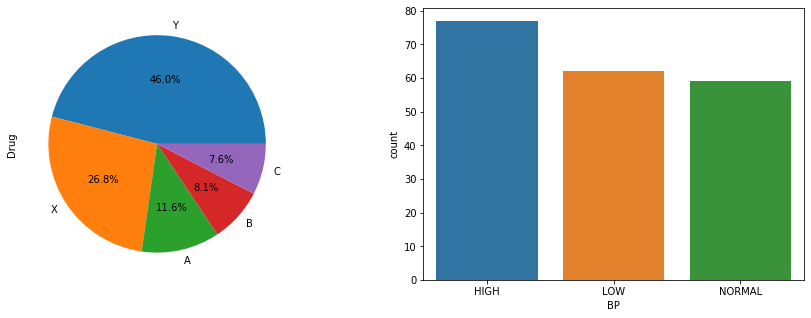

In [15]:
#Checking if there is any pattern between type of Drug and Blood Pressure

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Drug'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['BP'])
df['BP'].value_counts()

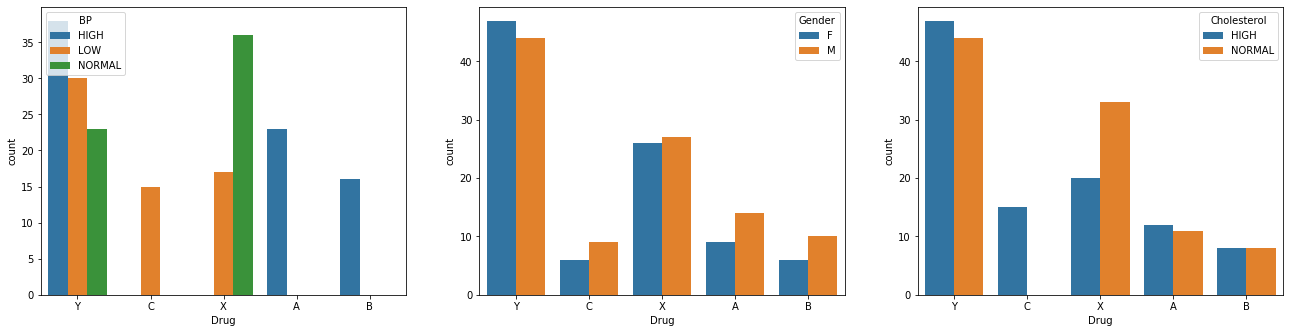

In [16]:
# Checking the relationship that our target variable has with the other categorical variables

fig, axs = plt.subplots(ncols=3)
fig.subplots_adjust(top=3,bottom=2,right=3)
sns.countplot(x='Drug', hue = "BP", data=df, ax=axs[0])
sns.countplot(x='Drug', hue = 'Gender', data=df, ax=axs[1])
sns.countplot(x='Drug',hue = 'Cholesterol', data=df, ax=axs[2])

In [17]:
# Select the categorical variables
cols = ['Gender','BP','Cholesterol','Drug']


# Transform the categorical variables to (0,1) format
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [18]:
# For the non categorical variables have decided to do
# scaling of these varibles because Since the range of values of raw data varies widely, 
# in some machine learning algorithms, objective functions do not work correctly without normalization.

scaling = MinMaxScaler()
ncols = ['Age','Na_to_K']

df[ncols] = scaling.fit_transform(df[ncols])

In [19]:
# Correlation plot to check the relations of the variables between them

#fig, ax = plt.subplots(figsize  = (10, 10))
#sns.heatmap(df.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True, ax = ax)
#plt.show()

In [20]:
# Assigning Y (target variable) that for us is Drug and X the rest Y~X

X = df.drop('Drug', axis = 1)
Y = df['Drug']

In [21]:
#Train and Test split

X_train, X_test, y_train, y_test = train_test_split( X, Y, random_state=42)

In [22]:
# Checking the proportion of data

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (148, 5)
X_test (50, 5)
y_train (148,)
y_test (50,)


In [30]:
# Decition Tree 

dt = DT(criterion = 'entropy').fit(X_train, y_train)

y_pred = dt.predict(X_test)

DT_score = accuracy_score(y_test, y_pred)

print(f'Acc : {accuracy_score(y_test, y_pred)}')
print(f'F1 : {f1_score(y_test, y_pred, average = "macro")}')
      
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acc : 0.98
F1 : 0.9580952380952381
[[ 7  0  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        24

    accuracy                           0.98        50
   macro avg       0.97      0.95      0.96        50
weighted avg       0.98      0.98      0.98        50



In [31]:
# Random Forest

Random_class = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=4, random_state = 1)

Random_class.fit(X_train, y_train)

y_pred = Random_class.predict(X_test)

print(Random_class.score(X_train,y_train)*100)

Forest_score = accuracy_score(y_test, y_pred)

print(Forest_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

100.0
96.0
[[ 7  0  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  2  1  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.75      0.86         4
           2       1.00      0.67      0.80         3
           3       0.92      1.00      0.96        12
           4       1.00      1.00      1.00        24

    accuracy                           0.96        50
   macro avg       0.96      0.88      0.91        50
weighted avg       0.96      0.96      0.96        50



In [34]:
# K-nearest neighbors algorithm

KNN_class = KNeighborsClassifier(n_neighbors = 3)

KNN_class.fit(X_train, y_train)
y_pred = KNN_class.predict(X_test)


KNN_score = accuracy_score(y_test, y_pred)

print(KNN_score*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

86.0
[[ 6  0  0  0  1]
 [ 1  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 11  1]
 [ 1  1  0  2 20]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         3
           3       0.85      0.92      0.88        12
           4       0.91      0.83      0.87        24

    accuracy                           0.86        50
   macro avg       0.85      0.87      0.86        50
weighted avg       0.86      0.86      0.86        50



In [35]:
x = ['Forest_score', 'DT_score','KNN_score']
y = [Forest_score, DT_score, KNN_score]

Text(0.5, 1.03, 'Multiple Classification Models Plot')

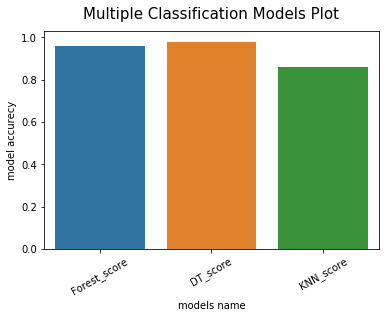

In [36]:
sns.barplot(x = x, y = y)
plt.ylabel('model accurecy')
plt.xlabel('models name')
plt.xticks(rotation = 30)
plt.title("Multiple Classification Models Plot", fontsize=15, y=1.03)

In [ ]:
# Choosing different models to see if there was any difference in the performance and we can notice that 
# Random Forest and Decision Tree algorithms are doing 96 and 98% of accuracy 
# Behind them is KNN algorithm with 86% which is still a very good prediction and 
